### Dataset - https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

| Column Name                 | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| **Age**                    | Age of the patient in years                                                 |
| **Gender**                 | Gender of the patient (`Male` or `Female`)                                  |
| **Total_Bilirubin**        | Total bilirubin level in the blood (mg/dL)                                  |
| **Direct_Bilirubin**       | Direct (conjugated) bilirubin level in the blood (mg/dL)                    |
| **Alkaline_Phosphotase**   | Level of alkaline phosphatase enzyme (IU/L)                                 |
| **Alamine_Aminotransferase** | Level of ALT (SGPT) enzyme in the blood (IU/L)                            |
| **Aspartate_Aminotransferase** | Level of AST (SGOT) enzyme in the blood (IU/L)                         |
| **Total_Protiens**         | Total protein content in blood (g/dL)                                       |
| **Albumin**                | Albumin level in the blood (g/dL)                                           |
| **Albumin_and_Globulin_Ratio** | Ratio of albumin to globulin in the blood                              |
| **Dataset**                | Target variable: `1` = Liver disease, `2` = No liver disease                |


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras import layers
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_url = "https://raw.githubusercontent.com/Sunnyanai-alt/LIVER-CIROHSIS-FINAL/main/indian_liver_patient.csv"
df = pd.read_csv(raw_url)

### Preprocessing

In [3]:
df.rename(columns={
    'Dataset': 'Liver_Disease'  # 1 = Liver disease, 2 = No liver disease
}, inplace=True)

df['Liver_Disease'] = df['Liver_Disease'].map({1: 1, 2: 0})

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [8]:
# Fill null values with mean
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Liver_Disease               583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [13]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


- **Age**: Age of the patient (mean: 44.75, min: 4, max: 90) — fairly symmetric distribution.
- **Gender**: Encoded as 1 for Male and 0 for Female (mean: 0.76) — slightly skewed towards male patients.
- **Total_Bilirubin**: Measures total bilirubin in blood (mean: 3.30, max: 75.0) — **highly right-skewed** due to extreme outliers.
- **Direct_Bilirubin**: Measures direct bilirubin (mean: 1.49, max: 19.7) — **right-skewed** distribution.
- **Alkaline_Phosphotase**: Liver enzyme (mean: 290.58, max: 2110) — **right-skewed**, outliers present.
- **Alamine_Aminotransferase**: Enzyme related to liver function (mean: 80.71, max: 2000) — **heavily right-skewed**.
- **Aspartate_Aminotransferase**: Indicates liver/muscle damage (mean: 109.91, max: 4929) — **highly right-skewed**, strong outliers.
- **Total_Protiens**: Total protein level in blood (mean: 6.48, range: 2.7–9.6) — approximately **normal distribution**.
- **Albumin**: Protein made by liver (mean: 3.14, range: 0.9–5.5) — **slightly left-skewed**.
- **Albumin_and_Globulin_Ratio**: Ratio of albumin to globulin (mean: 0.95, range: 0.3–2.8) — **moderately right-skewed**.
- **Liver_Disease**: Target variable; 1 = liver disease, 0 = no disease (mean: 0.71) — **slightly imbalanced** towards liver disease cases.


In [14]:
df = df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int64  
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Liver_Disease               570 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.4 KB


### Feature Engineering

In [16]:
# Apply log transformation to highly skewed columns (adding 1 to avoid log(0))
for col in ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
            'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']:
    df[f'log_{col}'] = np.log1p(df[col])

In [17]:
# labels = ['Child/Teen', 'Young Adult', 'Middle Aged', 'Senior']
bins = [0, 18, 35, 50, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, right=False)

# Convert categorical bins to integer codes: 0, 1, 2, 3, ...
df['Age_Group'] = df['Age_Group'].cat.codes

In [18]:
df['Bilirubin_Ratio'] = df['Direct_Bilirubin'] / (df['Total_Bilirubin'] + 1e-5)  # adding epsilon to avoid division by zero

In [19]:
df['Enzyme_Sum'] = df['Alamine_Aminotransferase'] + df['Aspartate_Aminotransferase']

In [20]:
# Cap values at the 5th and 95th percentiles
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
            'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']:
    df[col] = cap_outliers(df[col])

In [21]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase,Age_Group,Bilirubin_Ratio,Enzyme_Sum
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0.530628,0.095310,5.236442,2.833213,2.944439,3,0.142855,34
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,2.476538,1.871802,6.551080,4.174387,4.615121,3,0.504587,164
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,2.116256,1.629241,6.196444,4.110874,4.234107,3,0.561643,128
3,58,1,1.0,0.4,182.0,15.0,20.0,6.8,3.4,1.00,1,0.693147,0.336472,5.209486,2.708050,3.044522,3,0.399996,34
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1.589235,1.098612,5.278115,3.332205,4.094345,3,0.512819,86


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             570 non-null    int64  
 1   Gender                          570 non-null    int64  
 2   Total_Bilirubin                 570 non-null    float64
 3   Direct_Bilirubin                570 non-null    float64
 4   Alkaline_Phosphotase            570 non-null    float64
 5   Alamine_Aminotransferase        570 non-null    float64
 6   Aspartate_Aminotransferase      570 non-null    float64
 7   Total_Protiens                  570 non-null    float64
 8   Albumin                         570 non-null    float64
 9   Albumin_and_Globulin_Ratio      570 non-null    float64
 10  Liver_Disease                   570 non-null    int64  
 11  log_Total_Bilirubin             570 non-null    float64
 12  log_Direct_Bilirubin            570 non-n

### Correlation Check with Liver_Disease

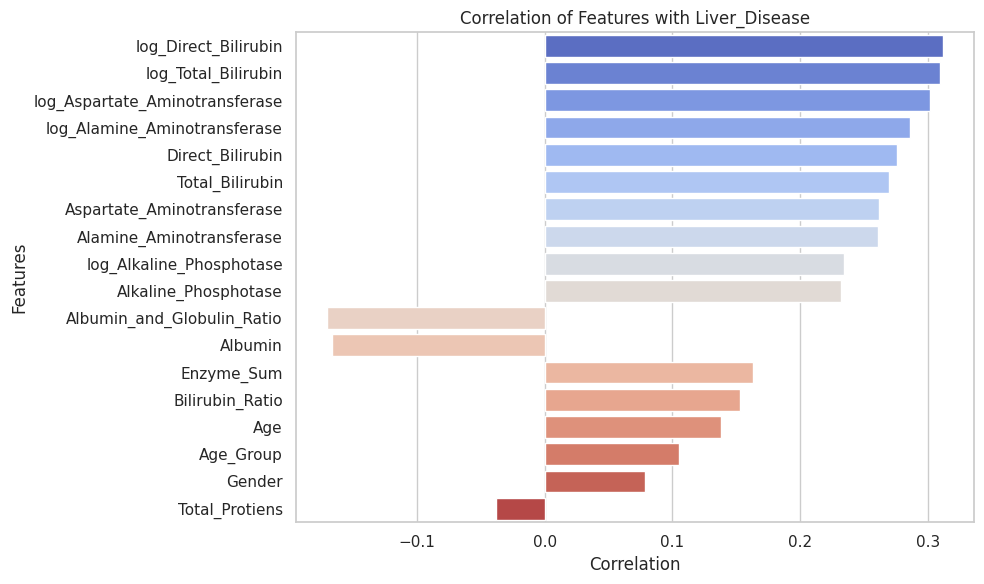

In [23]:
# Calculate correlation of each feature with the Liver_Disease variable
target_corr = df.corr()['Liver_Disease'].drop('Liver_Disease').sort_values(key=abs, ascending=False)

# Plot top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Liver_Disease')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


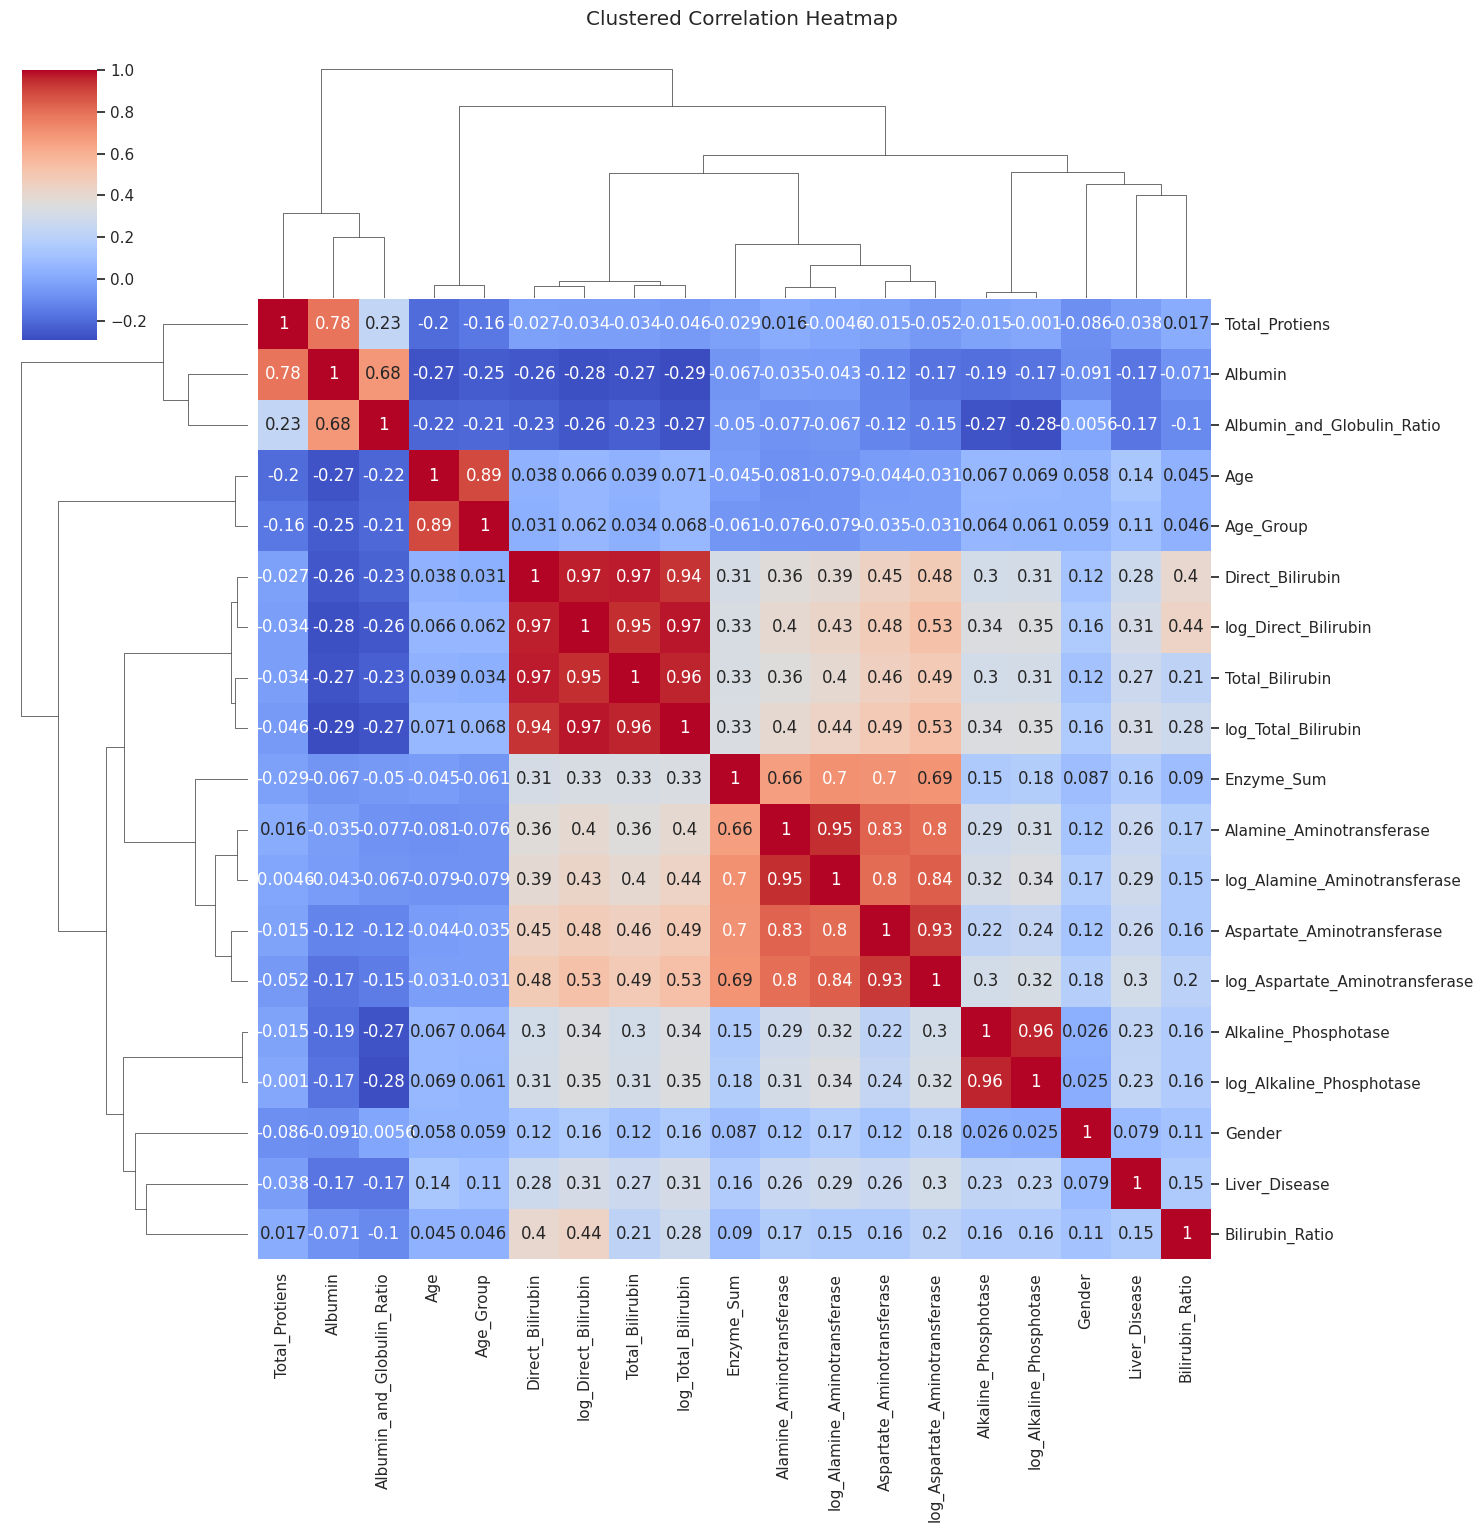

In [24]:
# Full correlation matrix
corr = df.corr()

# Clustered heatmap
sns.clustermap(corr, cmap='coolwarm', annot=True, figsize=(15, 15))
plt.suptitle("Clustered Correlation Heatmap", y=1.02)
plt.show()

### Visualization

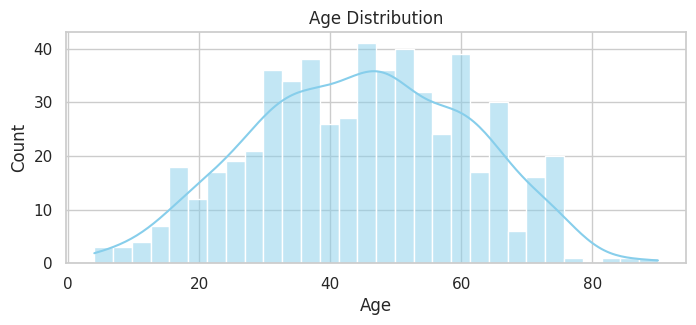

In [25]:
# Distribution of age
plt.figure(figsize=(8, 3))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

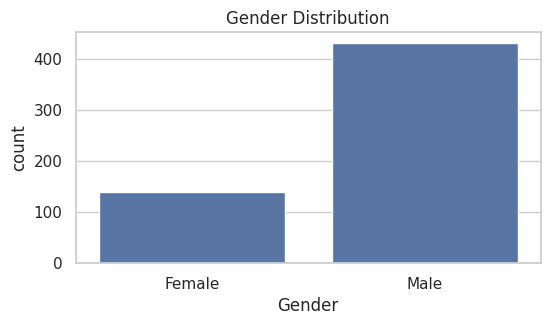

In [26]:
# Gender distribution
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Gender Distribution")
plt.show()

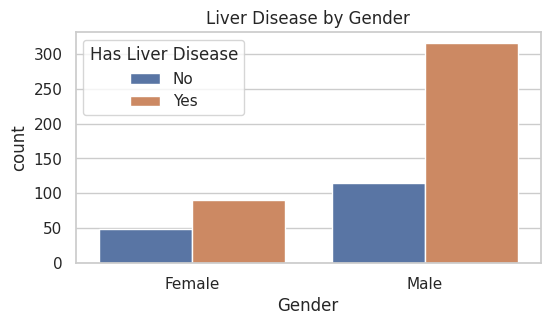

In [27]:
# Liver Disease by Gender
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Gender', hue='Liver_Disease')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Liver Disease by Gender")
plt.legend(title='Has Liver Disease', labels=['No', 'Yes'])
plt.show()

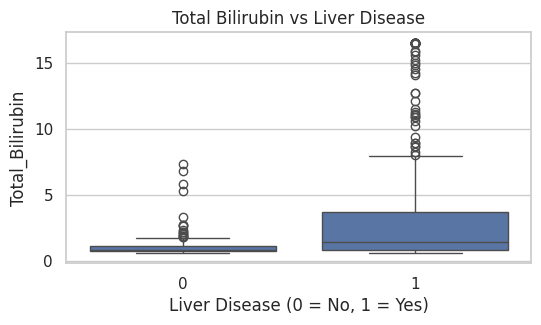

In [28]:
# Boxplot for Total Bilirubin by Liver Disease status
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Liver_Disease', y='Total_Bilirubin')
plt.title("Total Bilirubin vs Liver Disease")
plt.xlabel("Liver Disease (0 = No, 1 = Yes)")
plt.show()

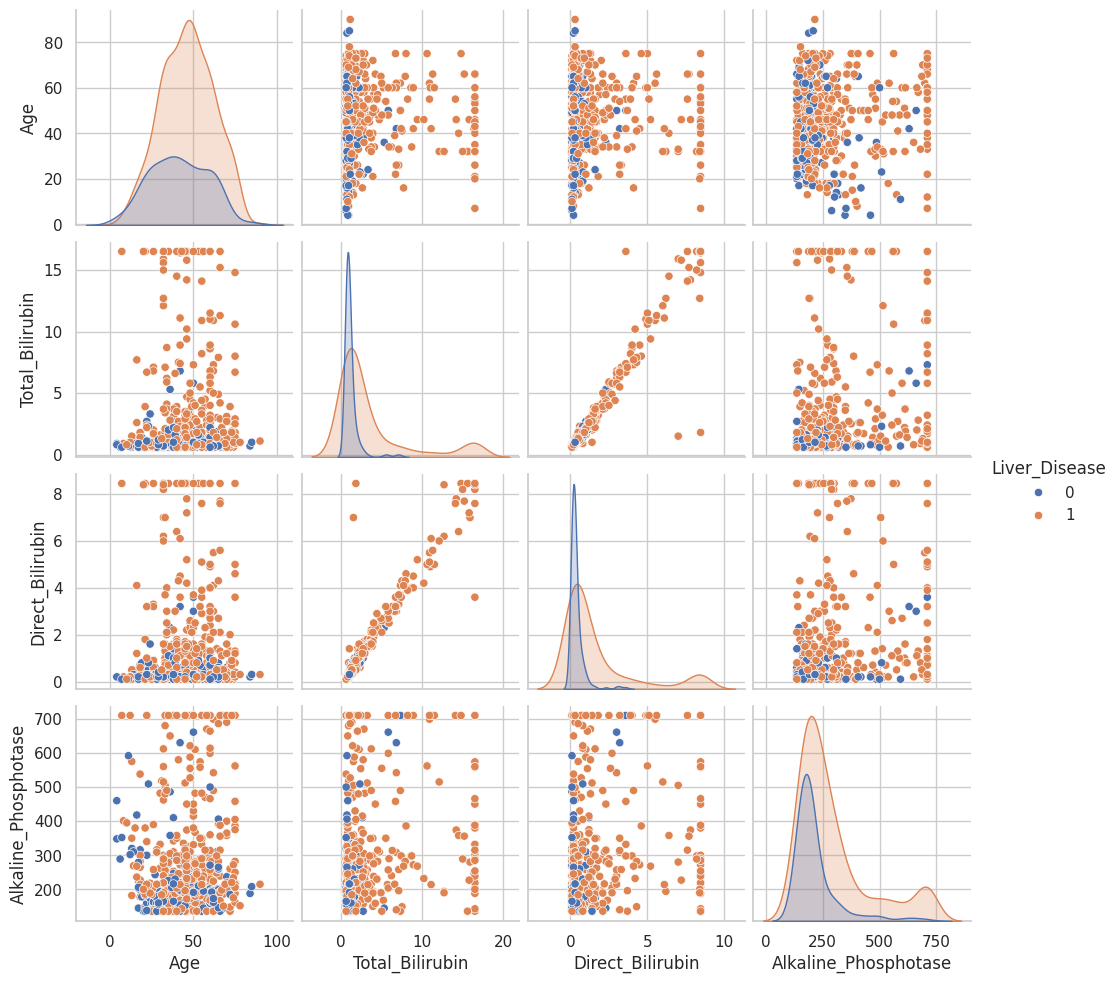

In [29]:
# Pairplot of important features
important_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Liver_Disease']
sns.pairplot(df[important_features], hue='Liver_Disease', diag_kind='kde')
plt.show()

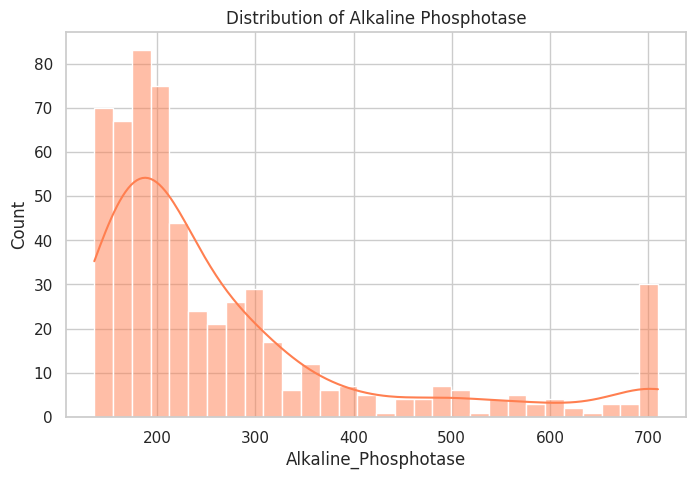

In [30]:
# Distribution of Alkaline Phosphotase
plt.figure(figsize=(8, 5))
sns.histplot(df['Alkaline_Phosphotase'], bins=30, kde=True, color='coral')
plt.title("Distribution of Alkaline Phosphotase")
plt.xlabel("Alkaline_Phosphotase")
plt.ylabel("Count")
plt.show()

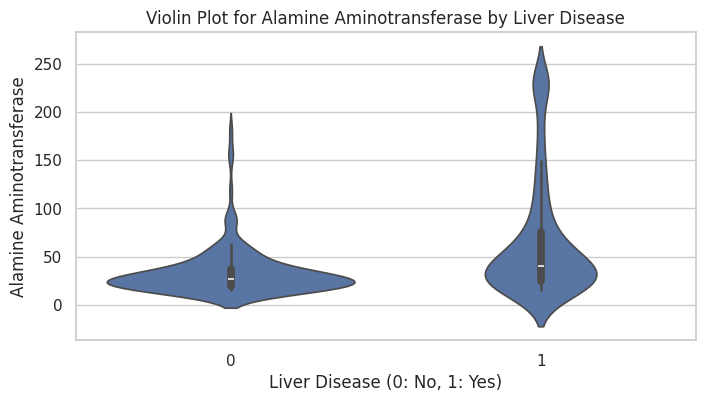

In [31]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Liver_Disease', y='Alamine_Aminotransferase')
plt.title("Violin Plot for Alamine Aminotransferase by Liver Disease")
plt.xlabel("Liver Disease (0: No, 1: Yes)")
plt.ylabel("Alamine Aminotransferase")
plt.show()

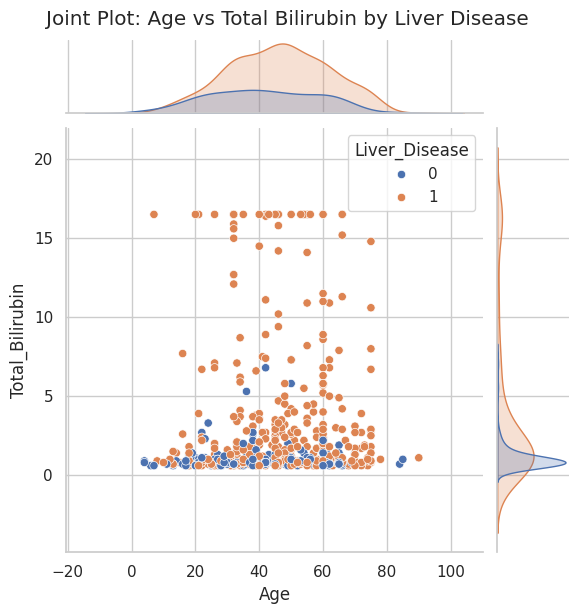

In [32]:
sns.jointplot(data=df, x='Age', y='Total_Bilirubin', kind='scatter', hue='Liver_Disease')
plt.suptitle("Joint Plot: Age vs Total Bilirubin by Liver Disease", y=1.02)
plt.show()

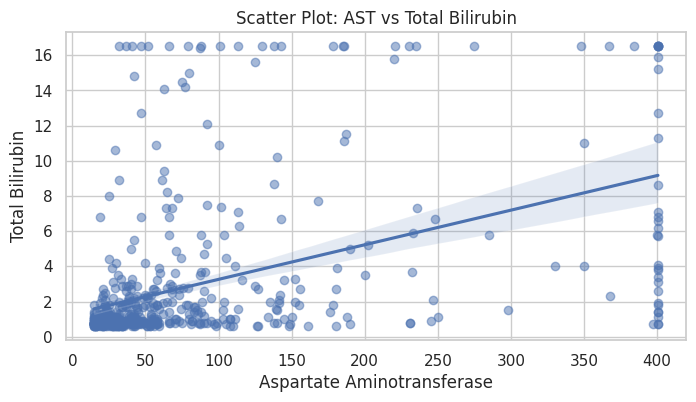

In [33]:
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='Aspartate_Aminotransferase', y='Total_Bilirubin', scatter_kws={'alpha':0.5})
plt.title("Scatter Plot: AST vs Total Bilirubin")
plt.xlabel("Aspartate Aminotransferase")
plt.ylabel("Total Bilirubin")
plt.show()

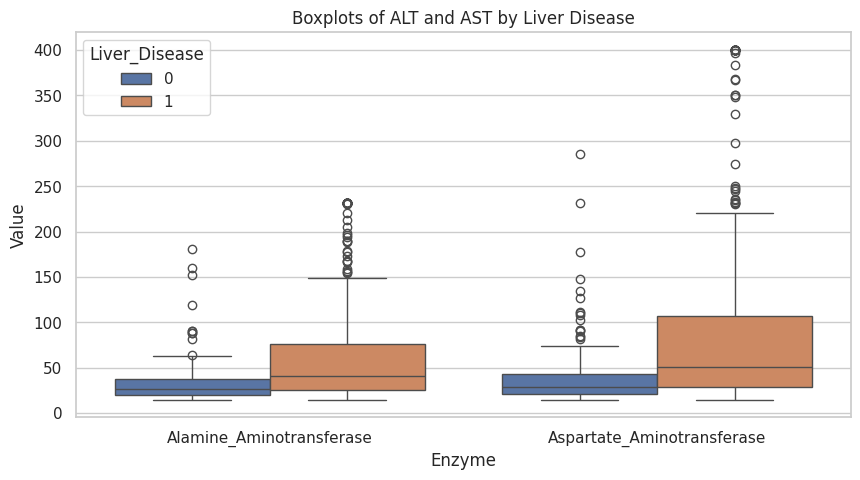

In [34]:
# Reshape the data for easier plotting with seaborn
df_melt = pd.melt(df, id_vars=['Liver_Disease'],
                  value_vars=['Alamine_Aminotransferase', 'Aspartate_Aminotransferase'],
                  var_name='Enzyme', value_name='Value')

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_melt, x='Enzyme', y='Value', hue='Liver_Disease')
plt.title("Boxplots of ALT and AST by Liver Disease")
plt.show()

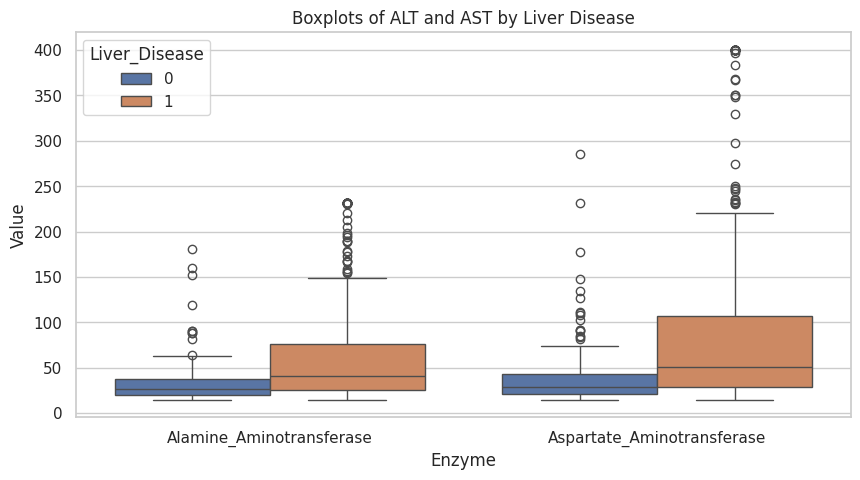

In [35]:
# Reshape the data for easier plotting with seaborn
df_melt = pd.melt(df, id_vars=['Liver_Disease'],
                  value_vars=['Alamine_Aminotransferase', 'Aspartate_Aminotransferase'],
                  var_name='Enzyme', value_name='Value')

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_melt, x='Enzyme', y='Value', hue='Liver_Disease')
plt.title("Boxplots of ALT and AST by Liver Disease")
plt.show()

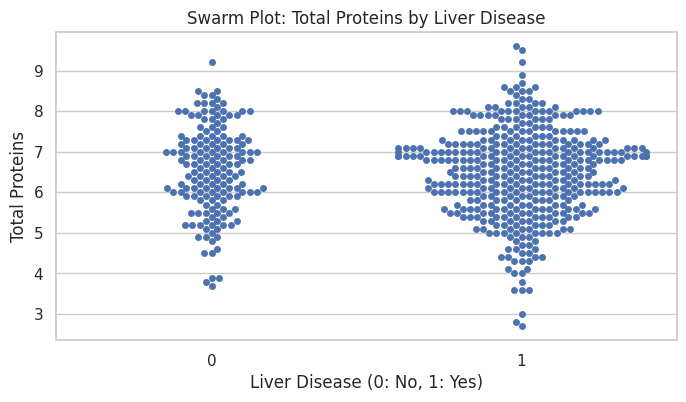

In [36]:
plt.figure(figsize=(8, 4))
sns.swarmplot(data=df, x='Liver_Disease', y='Total_Protiens')
plt.title("Swarm Plot: Total Proteins by Liver Disease")
plt.xlabel("Liver Disease (0: No, 1: Yes)")
plt.ylabel("Total Proteins")
plt.show()

In [37]:
# Prepare features and target
X = df.drop(columns=['Liver_Disease'])
y = df['Liver_Disease']

### Normalization & Data Splitting

In [38]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [39]:
# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### SmoteTomek (Data Balance)

In [40]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

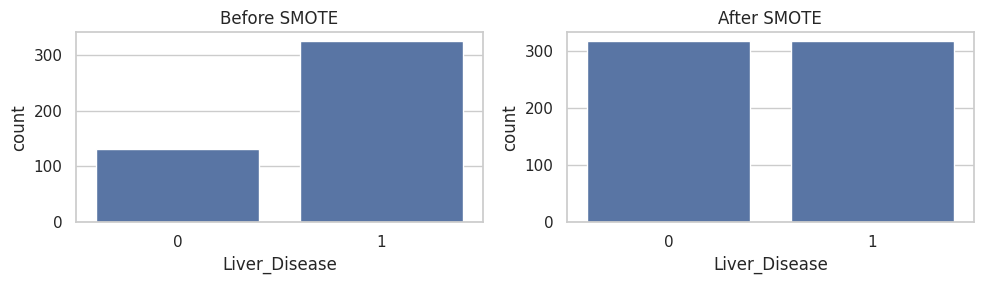

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE")

sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title("After SMOTE")

plt.tight_layout()
plt.show()

### Algorithms

### Random Forest

Random Forest - Without SMOTETomek:
               precision    recall  f1-score   support

           0       0.54      0.21      0.30        33
           1       0.74      0.93      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.57      0.56       114
weighted avg       0.68      0.72      0.67       114

Confusion Matrix:
 [[ 7 26]
 [ 6 75]]


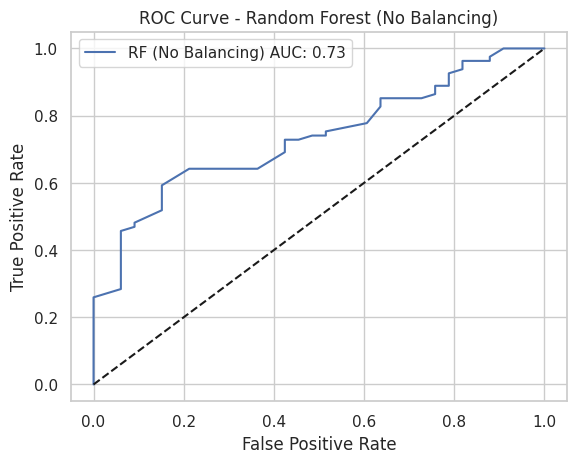

Random Forest - With SMOTETomek:
               precision    recall  f1-score   support

           0       0.54      0.42      0.47        33
           1       0.78      0.85      0.82        81

    accuracy                           0.73       114
   macro avg       0.66      0.64      0.65       114
weighted avg       0.71      0.73      0.72       114

Confusion Matrix:
 [[14 19]
 [12 69]]


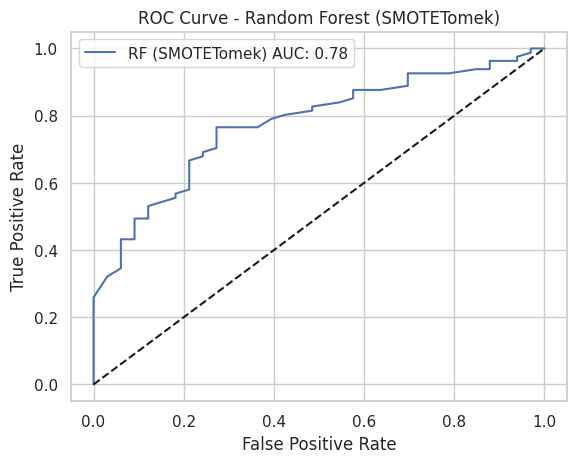

In [42]:
# --- Without SMOTETomek (Original Data) ---
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Random Forest - Without SMOTETomek:\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'RF (No Balancing) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (No Balancing)")
plt.legend()
plt.show()

# --- With SMOTETomek ---
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)
print("Random Forest - With SMOTETomek:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'RF (SMOTETomek) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (SMOTETomek)")
plt.legend()
plt.show()


### Logistic Regression

Logistic Regression - Without SMOTETomek:
               precision    recall  f1-score   support

           0       0.52      0.33      0.41        33
           1       0.76      0.88      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.60      0.61       114
weighted avg       0.69      0.72      0.70       114

Confusion Matrix:
 [[11 22]
 [10 71]]


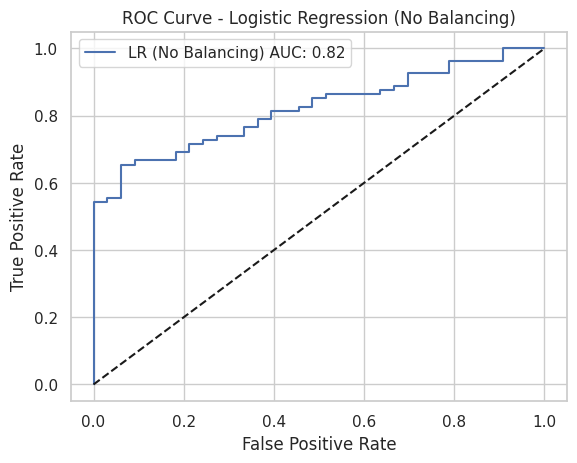

Logistic Regression - With SMOTETomek:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63        33
           1       0.89      0.70      0.79        81

    accuracy                           0.73       114
   macro avg       0.71      0.75      0.71       114
weighted avg       0.78      0.73      0.74       114

Confusion Matrix:
 [[26  7]
 [24 57]]


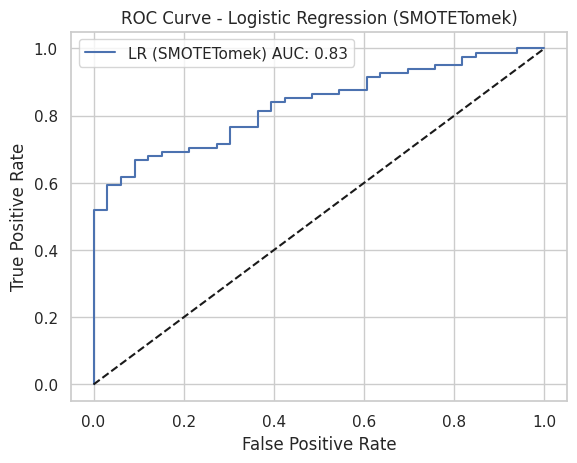

In [43]:
# --- Without SMOTETomek ---
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Logistic Regression - Without SMOTETomek:\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'LR (No Balancing) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (No Balancing)")
plt.legend()
plt.show()

# --- With SMOTETomek ---
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)
print("Logistic Regression - With SMOTETomek:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'LR (SMOTETomek) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (SMOTETomek)")
plt.legend()
plt.show()


Decision Tree - Without SMOTETomek:
               precision    recall  f1-score   support

           0       0.31      0.27      0.29        33
           1       0.72      0.75      0.73        81

    accuracy                           0.61       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.60      0.61      0.61       114

Confusion Matrix:
 [[ 9 24]
 [20 61]]


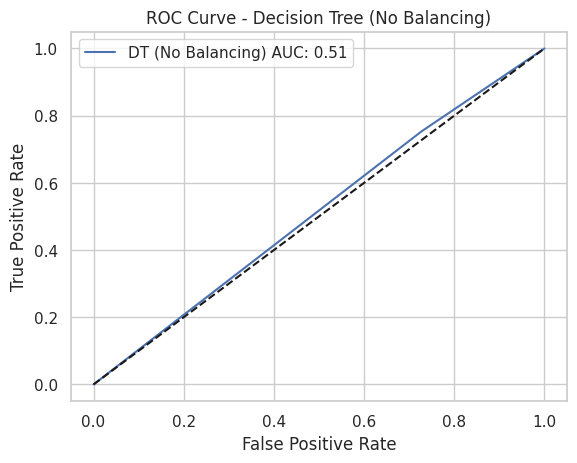

Decision Tree - With SMOTETomek:
               precision    recall  f1-score   support

           0       0.37      0.30      0.33        33
           1       0.74      0.79      0.76        81

    accuracy                           0.65       114
   macro avg       0.55      0.55      0.55       114
weighted avg       0.63      0.65      0.64       114

Confusion Matrix:
 [[10 23]
 [17 64]]


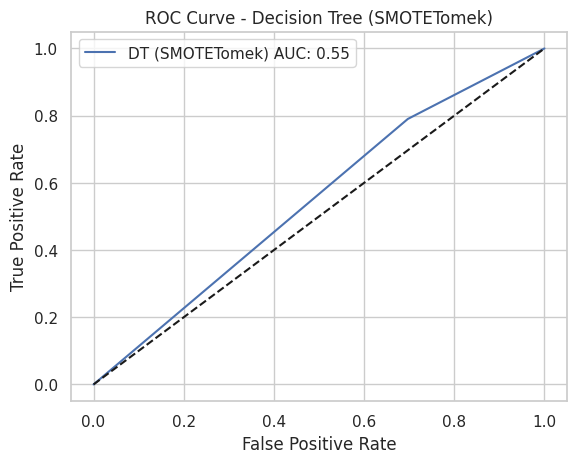

In [44]:
# --- Without SMOTETomek ---
model_original = DecisionTreeClassifier(random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Decision Tree - Without SMOTETomek:\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'DT (No Balancing) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (No Balancing)")
plt.legend()
plt.show()

# --- With SMOTETomek ---
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)
print("Decision Tree - With SMOTETomek:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'DT (SMOTETomek) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (SMOTETomek)")
plt.legend()
plt.show()


SVM - Without SMOTETomek:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      1.00      0.83        81

    accuracy                           0.71       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.50      0.71      0.59       114

Confusion Matrix:
 [[ 0 33]
 [ 0 81]]


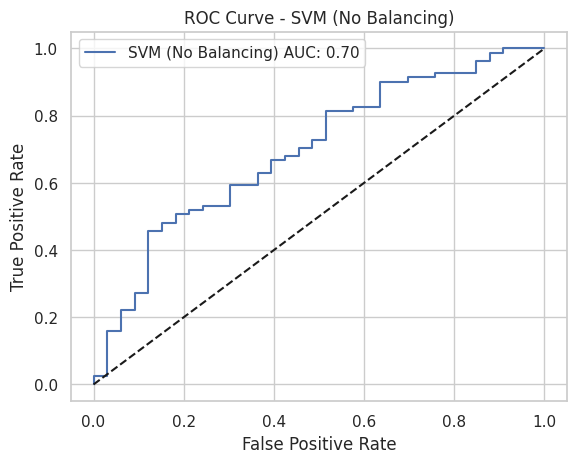

SVM - With SMOTETomek:
               precision    recall  f1-score   support

           0       0.53      0.79      0.63        33
           1       0.89      0.72      0.79        81

    accuracy                           0.74       114
   macro avg       0.71      0.75      0.71       114
weighted avg       0.79      0.74      0.75       114

Confusion Matrix:
 [[26  7]
 [23 58]]


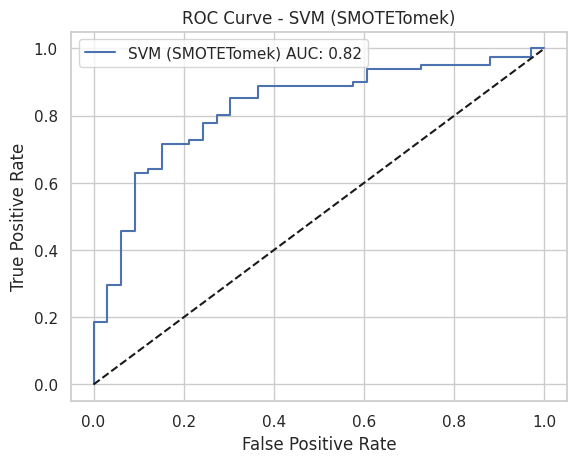

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# --- Without SMOTETomek ---
model_original = SVC(probability=True, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("SVM - Without SMOTETomek:\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (No Balancing) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (No Balancing)")
plt.legend()
plt.show()

# --- With SMOTETomek ---
model_smote = SVC(probability=True, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)
print("SVM - With SMOTETomek:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (SMOTETomek) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (SMOTETomek)")
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Neural Network - Without SMOTETomek:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      1.00      0.83        81

    accuracy                           0.71       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.50      0.71      0.59       114

Confusion Matrix:
 [[ 0 33]
 [ 0 81]]


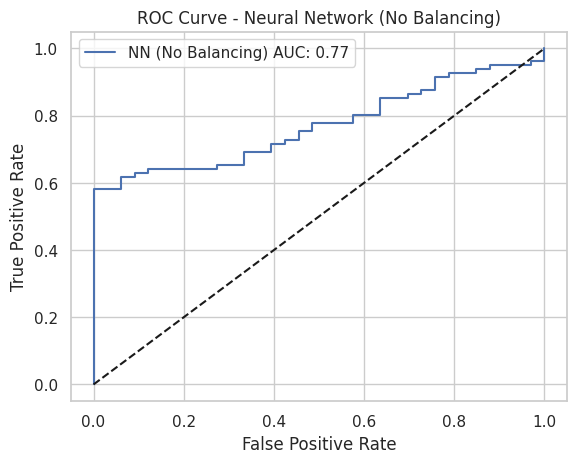

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Neural Network - With SMOTETomek:
               precision    recall  f1-score   support

           0       0.55      0.79      0.65        33
           1       0.90      0.74      0.81        81

    accuracy                           0.75       114
   macro avg       0.72      0.76      0.73       114
weighted avg       0.80      0.75      0.76       114

Confusion Matrix:
 [[26  7]
 [21 60]]


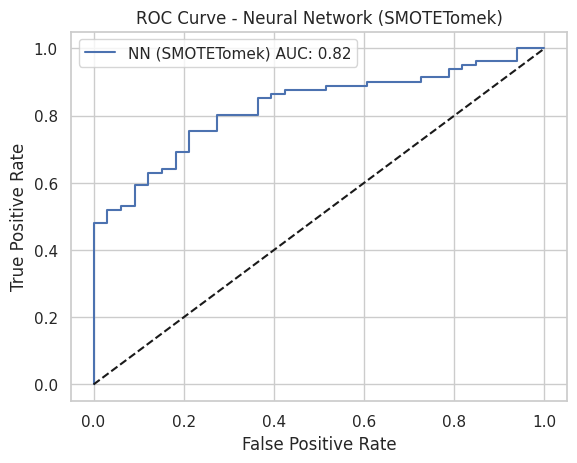

In [46]:
# --- Without SMOTETomek ---
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0,
             validation_split=0.1, callbacks=[EarlyStopping(patience=30, restore_best_weights=True)])
y_pred_prob = nn_model.predict(X_test).ravel()
y_pred_original = (y_pred_prob >= 0.5).astype(int)
print("Neural Network - Without SMOTETomek:\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'NN (No Balancing) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (No Balancing)")
plt.legend()
plt.show()

# --- With SMOTETomek ---
nn_model_smote = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
nn_model_smote.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_smote.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, verbose=0,
                   validation_split=0.1, callbacks=[EarlyStopping(patience=30, restore_best_weights=True)])
y_pred_prob = nn_model_smote.predict(X_test).ravel()
y_pred_smote = (y_pred_prob >= 0.5).astype(int)
print("Neural Network - With SMOTETomek:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'NN (SMOTETomek) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (SMOTETomek)")
plt.legend()
plt.show()


**VAE**

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


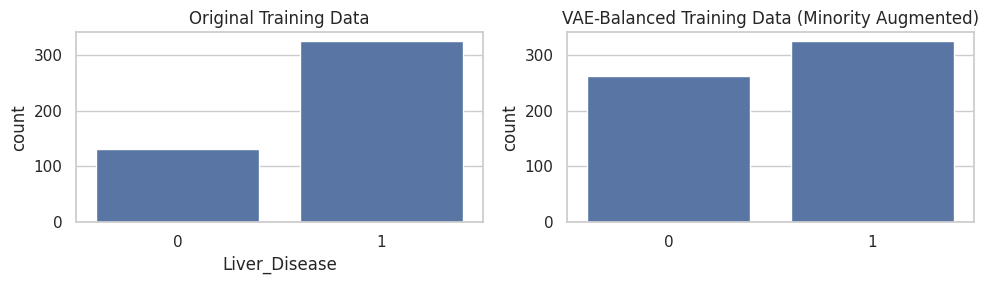

In [47]:
# VAE architecture parameters
original_dim = X_train.shape[1]
intermediate_dim = 16
latent_dim = 8

# ----------------- Define the Encoder -----------------
# The encoder will output three tensors: z_mean, z_log_var, and the sampled z.
inputs = layers.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim, name='z_mean')(h)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(h)

def sampling(args):
    z_mean, z_log_var = args
    # Use tf.random.normal to sample epsilon
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Specify output shape for the Lambda layer
z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# ----------------- Define the Decoder -----------------
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='linear')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# ----------------- Define the VAE as a Subclassed Model -----------------
class VAE(Model):
    def __init__(self, encoder, decoder, original_dim, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.original_dim = original_dim

    def train_step(self, data):
        # Data may come in as a tuple (x, _) if y values are provided
        if isinstance(data, tuple):
            x, _ = data
        else:
            x = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            reconstruction = self.decoder(z)
            # Reconstruction loss (MSE)
            reconstruction_loss = tf.reduce_mean(tf.square(x - reconstruction), axis=-1)
            reconstruction_loss *= self.original_dim
            # KL divergence loss
            kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
            # Total loss
            total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": total_loss}

# Instantiate and compile the VAE
vae = VAE(encoder, decoder, original_dim)
vae.compile(optimizer='adam')

# Train the VAE on the original training data (X_train)
vae.fit(X_train, X_train, epochs=50, batch_size=32, verbose=0)

# ----------------- Generate Synthetic Data for Minority Class Only -----------------
# Determine the minority class.
# We assume y_train contains the labels (e.g., 0 and 1)
unique, counts = np.unique(y_train, return_counts=True)
minority_class = unique[np.argmin(counts)]

# Filter the minority class samples in the training data
X_train_minority = X_train[y_train == minority_class]

# Generate synthetic data ONLY from the minority class using VAE
z_mean_min, z_log_var_min, z_min = encoder.predict(X_train_minority)
X_train_minority_synthetic = decoder.predict(z_min)

# Combine synthetic minority data with original training data
X_train_vae = np.concatenate([X_train, X_train_minority_synthetic])
y_train_vae = np.concatenate([y_train, np.full(shape=(X_train_minority_synthetic.shape[0],), fill_value=minority_class)])

# ----------------- Plot the Class Distribution -----------------
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Original Training Data")
sns.countplot(x=y_train_vae, ax=ax[1])
ax[1].set_title("VAE-Balanced Training Data (Minority Augmented)")
plt.tight_layout()
plt.show()


Random Forest - Without VAE (Original):
               precision    recall  f1-score   support

           0       0.54      0.21      0.30        33
           1       0.74      0.93      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.57      0.56       114
weighted avg       0.68      0.72      0.67       114

Confusion Matrix:
 [[ 7 26]
 [ 6 75]]


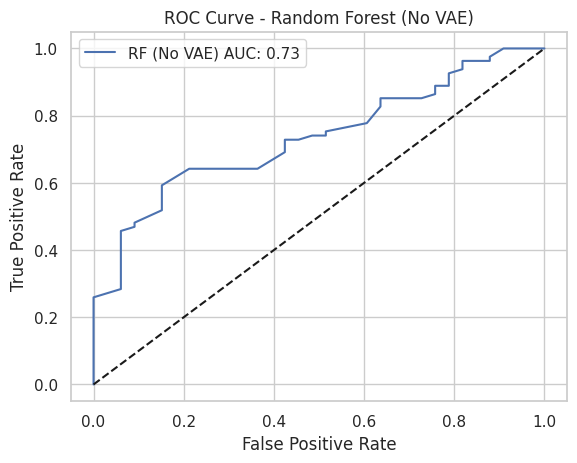

Random Forest - With VAE Balanced Data:
               precision    recall  f1-score   support

           0       0.57      0.36      0.44        33
           1       0.77      0.89      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.63      0.64       114
weighted avg       0.72      0.74      0.72       114

Confusion Matrix:
 [[12 21]
 [ 9 72]]


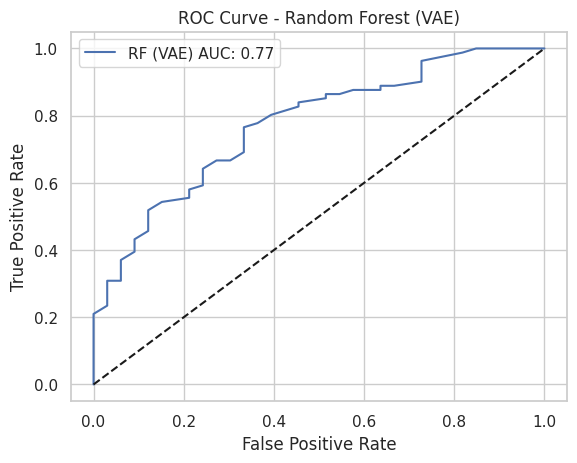

In [48]:
# --- Without VAE (Original Data) ---
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Random Forest - Without VAE (Original):\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'RF (No VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (No VAE)")
plt.legend()
plt.show()

# --- With VAE Balanced Data ---
model_vae = RandomForestClassifier(random_state=42)
model_vae.fit(X_train_vae, y_train_vae)
y_pred_vae = model_vae.predict(X_test)
print("Random Forest - With VAE Balanced Data:\n", classification_report(y_test, y_pred_vae))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vae))
y_pred_prob = model_vae.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'RF (VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (VAE)")
plt.legend()
plt.show()


Logistic Regression - Without VAE (Original):
               precision    recall  f1-score   support

           0       0.52      0.33      0.41        33
           1       0.76      0.88      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.60      0.61       114
weighted avg       0.69      0.72      0.70       114

Confusion Matrix:
 [[11 22]
 [10 71]]


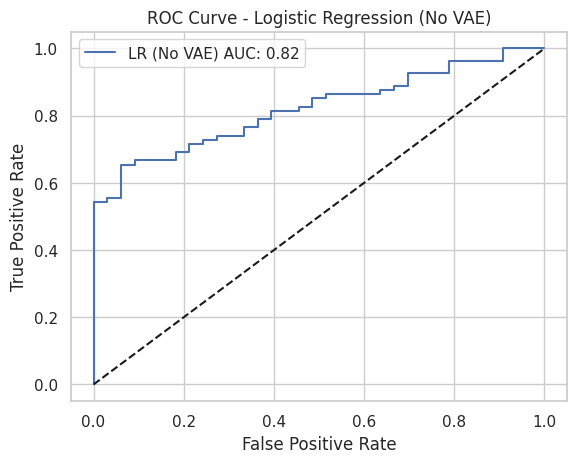

Logistic Regression - With VAE Balanced Data:
               precision    recall  f1-score   support

           0       0.49      0.70      0.57        33
           1       0.85      0.70      0.77        81

    accuracy                           0.70       114
   macro avg       0.67      0.70      0.67       114
weighted avg       0.75      0.70      0.71       114

Confusion Matrix:
 [[23 10]
 [24 57]]


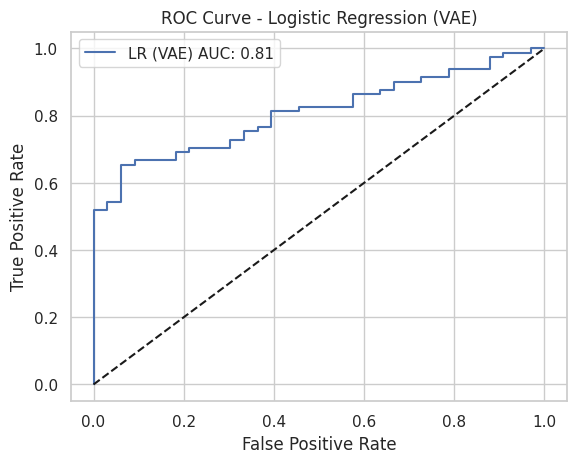

In [49]:
# --- Without VAE ---
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Logistic Regression - Without VAE (Original):\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'LR (No VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (No VAE)")
plt.legend()
plt.show()

# --- With VAE ---
model_vae = LogisticRegression(max_iter=1000, random_state=42)
model_vae.fit(X_train_vae, y_train_vae)
y_pred_vae = model_vae.predict(X_test)
print("Logistic Regression - With VAE Balanced Data:\n", classification_report(y_test, y_pred_vae))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vae))
y_pred_prob = model_vae.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'LR (VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (VAE)")
plt.legend()
plt.show()


Decision Tree - Without VAE (Original):
               precision    recall  f1-score   support

           0       0.31      0.27      0.29        33
           1       0.72      0.75      0.73        81

    accuracy                           0.61       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.60      0.61      0.61       114

Confusion Matrix:
 [[ 9 24]
 [20 61]]


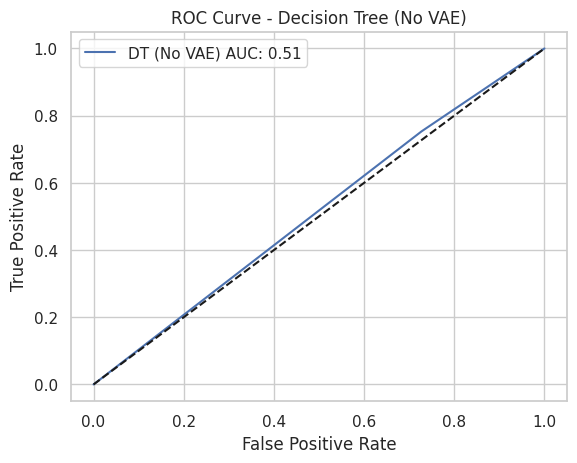

Decision Tree - With VAE Balanced Data:
               precision    recall  f1-score   support

           0       0.36      0.27      0.31        33
           1       0.73      0.80      0.76        81

    accuracy                           0.65       114
   macro avg       0.55      0.54      0.54       114
weighted avg       0.62      0.65      0.63       114

Confusion Matrix:
 [[ 9 24]
 [16 65]]


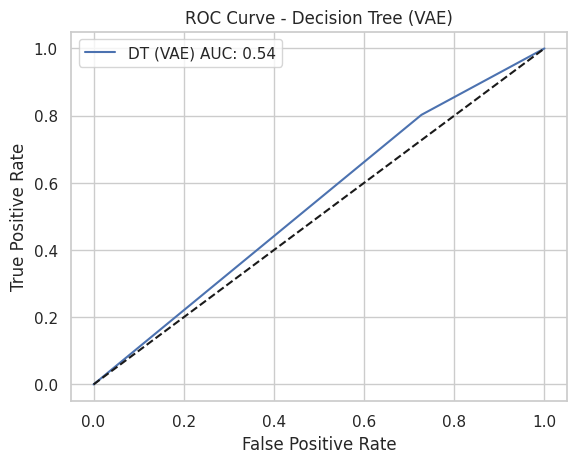

In [50]:
# --- Without VAE ---
model_original = DecisionTreeClassifier(random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("Decision Tree - Without VAE (Original):\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'DT (No VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (No VAE)")
plt.legend()
plt.show()

# --- With VAE ---
model_vae = DecisionTreeClassifier(random_state=42)
model_vae.fit(X_train_vae, y_train_vae)
y_pred_vae = model_vae.predict(X_test)
print("Decision Tree - With VAE Balanced Data:\n", classification_report(y_test, y_pred_vae))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vae))
y_pred_prob = model_vae.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'DT (VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (VAE)")
plt.legend()
plt.show()


SVM - Without VAE (Original):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      1.00      0.83        81

    accuracy                           0.71       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.50      0.71      0.59       114

Confusion Matrix:
 [[ 0 33]
 [ 0 81]]


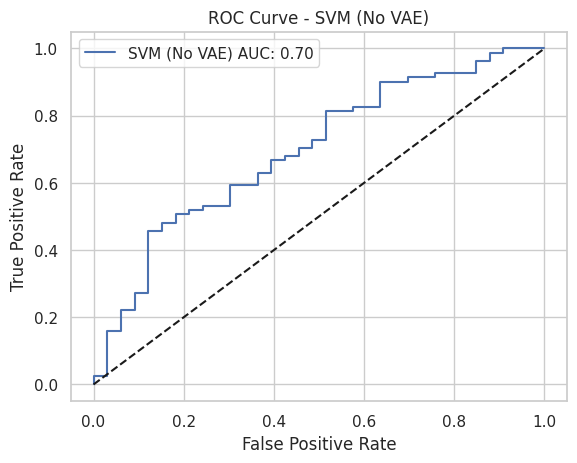

SVM - With VAE Balanced Data:
               precision    recall  f1-score   support

           0       0.57      0.39      0.46        33
           1       0.78      0.88      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.64      0.64       114
weighted avg       0.72      0.74      0.72       114

Confusion Matrix:
 [[13 20]
 [10 71]]


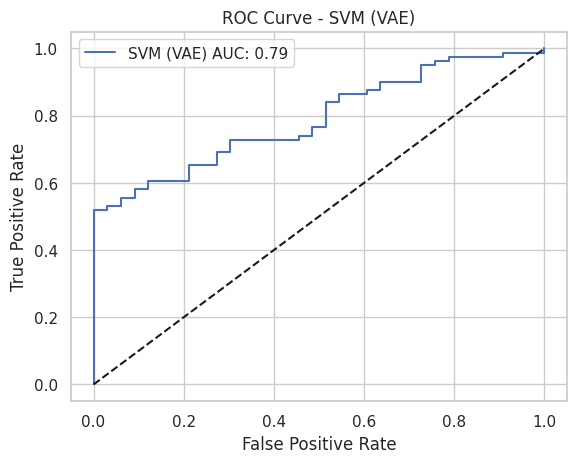

In [51]:
# --- Without VAE ---
model_original = SVC(probability=True, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
print("SVM - Without VAE (Original):\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
y_pred_prob = model_original.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (No VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (No VAE)")
plt.legend()
plt.show()

# --- With VAE ---
model_vae = SVC(probability=True, random_state=42)
model_vae.fit(X_train_vae, y_train_vae)
y_pred_vae = model_vae.predict(X_test)
print("SVM - With VAE Balanced Data:\n", classification_report(y_test, y_pred_vae))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vae))
y_pred_prob = model_vae.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (VAE)")
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Neural Network - Without VAE (Original):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      0.99      0.82        81

    accuracy                           0.70       114
   macro avg       0.35      0.49      0.41       114
weighted avg       0.50      0.70      0.59       114

Confusion Matrix:
 [[ 0 33]
 [ 1 80]]


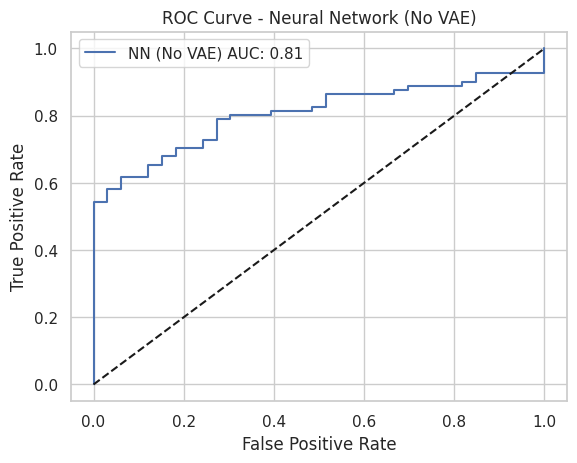

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Neural Network - With VAE Balanced Data:
               precision    recall  f1-score   support

           0       0.63      0.36      0.46        33
           1       0.78      0.91      0.84        81

    accuracy                           0.75       114
   macro avg       0.71      0.64      0.65       114
weighted avg       0.74      0.75      0.73       114

Confusion Matrix:
 [[12 21]
 [ 7 74]]


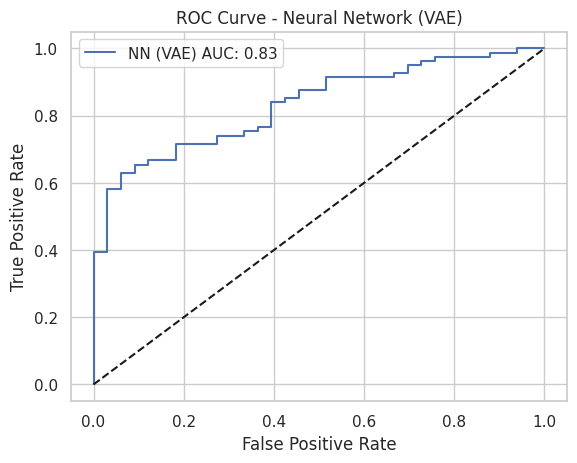

In [52]:
# --- Without VAE (Original Data) ---
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0,
             validation_split=0.1, callbacks=[EarlyStopping(patience=30, restore_best_weights=True)])
y_pred_prob = nn_model.predict(X_test).ravel()
y_pred_original = (y_pred_prob >= 0.5).astype(int)
print("Neural Network - Without VAE (Original):\n", classification_report(y_test, y_pred_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'NN (No VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (No VAE)")
plt.legend()
plt.show()

# --- With VAE Balanced Data ---
nn_model_vae = Sequential([
    Dense(64, input_dim=X_train_vae.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
nn_model_vae.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_vae.fit(X_train_vae, y_train_vae, epochs=50, batch_size=16, verbose=0,
                 validation_split=0.1, callbacks=[EarlyStopping(patience=30, restore_best_weights=True)])
y_pred_prob = nn_model_vae.predict(X_test).ravel()
y_pred_vae = (y_pred_prob >= 0.5).astype(int)
print("Neural Network - With VAE Balanced Data:\n", classification_report(y_test, y_pred_vae))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vae))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'NN (VAE) AUC: {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (VAE)")
plt.legend()
plt.show()